# Imports

In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas()
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import numpy as np 
from PIL import Image
import random

In [2]:
import torch
import numpy as np
from transformers import BertTokenizer
from torch import nn
from transformers import BertModel
from torch.optim import Adam
from tqdm import tqdm

In [3]:
# Import stopwords with nltk.
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [4]:
import pickle
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

## Data loading and Visualization

In [9]:
path = 'C:/Users/ht_13/OneDrive/Documents/6140-ML/Project/'
# load test result file
test_author = scipy.io.loadmat(path+'dataset/dataset/test_author.mat')["test_author"]
# load train dataFrame
train_df = pd.read_csv(path+'dataset/dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv',encoding = "ISO-8859-1")
# load train dataFrame
test_df = pd.read_csv(path+'dataset/dataset/Gungor_2018_VictorianAuthorAttribution_data.csv',encoding = "ISO-8859-1")
# load list of authors
f = open('author_list.txt', 'r')
author_list = f.read().split('\n')
f.close()

In [9]:
# print list of authers and create map dict
author_name_map_dict ={}
author_id_map_dict ={}
for i,author in enumerate(author_list):
    author_name_map_dict[author] = i
    author_id_map_dict[i] = author
    print(i+1, author)

1 Arthur Conan Doyle
2 Charles Darwin
3 Charles Dickens
4 Edith Wharton
5 George Eliot
6 Horace Greeley
7 Jack London
8 James Baldwin
9 Jane Austen
10 John Muir
11 Joseph Conrad
12 Mark Twain
13 Nathaniel Hawthorne
14 Ralph Emerson
15 Robert Louis Stevenson
16 Rudyard Kipling
17 Sinclair Lewis
18 Theodore Dreiser
19 Thomas Hardy
20 Walt Whitman
21 Washington Irving
22 William Carleton
23 Albert Ross
24 Anne Manning
25 Arlo Bates
26 Bret Harte
27 Catharine Maria Sedgwick
28 Charles Reade
29 Edward Eggleston
30 Fergus Hume
31 Frances Hodgson Burnett
32 George Moore
33 George William Curtis
34 Helen Mathers
35 Henry Rider Haggard
36 Isabella Lucy Bird
37 Jacob Abbott
38 James Grant
39 James Payn
40 John Kendrick Bangs
41 John Pendleton Kennedy
42 John Strange Winter
43 Lucas Malet
44 Marie Corelli
45 Oliver Optic
46 Sarah Orne Jewett
47 Sarah Stickney Ellis
48 Thomas Anstey Guthrie
49 Thomas Nelson Page
50 William Black


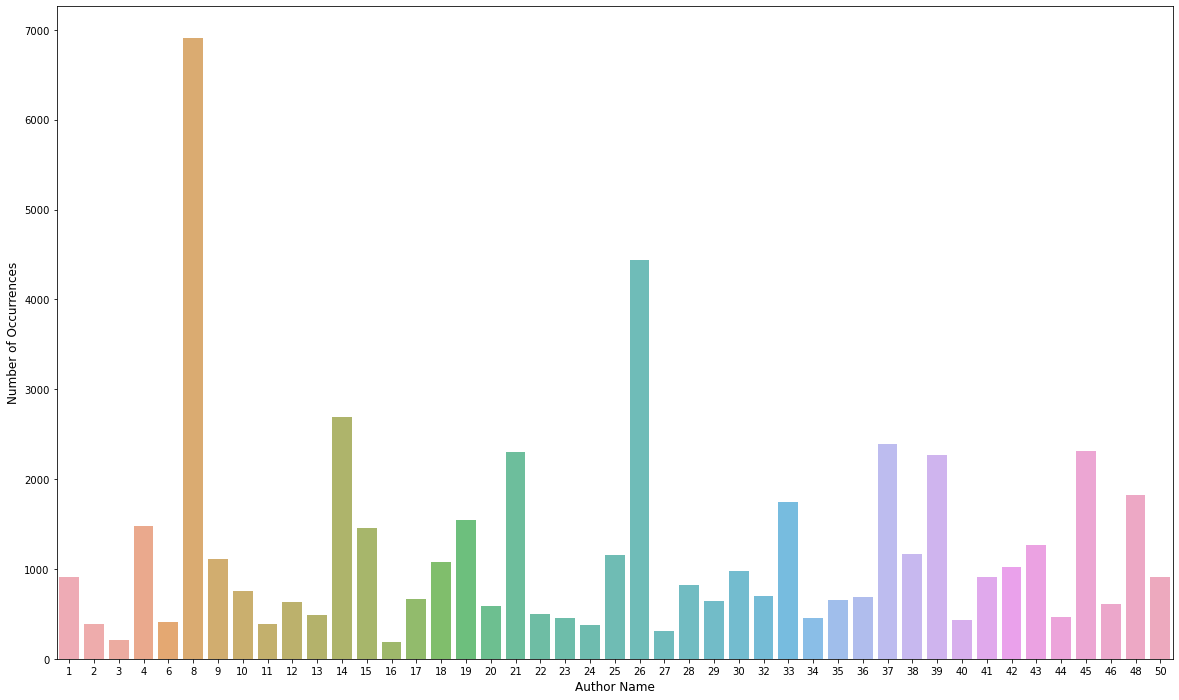

In [10]:
# plot class distribution for all the authors
cnt_srs = train_df['author'].value_counts()
plt.figure(figsize=(20,12))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [11]:
# printing number of train and test samples
print("Training sample number: ", train_df.shape)
print("Test sample number: ", test_df.shape)

Training sample number:  (53678, 2)
Test sample number:  (38809, 1)


In [12]:
train_df.head(n=5)

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


In [13]:
#Each line consists of 1000 words
str_list = train_df["text"][0].split(" ")
str_list = filter(None, str_list) 
len(list(str_list))

1000

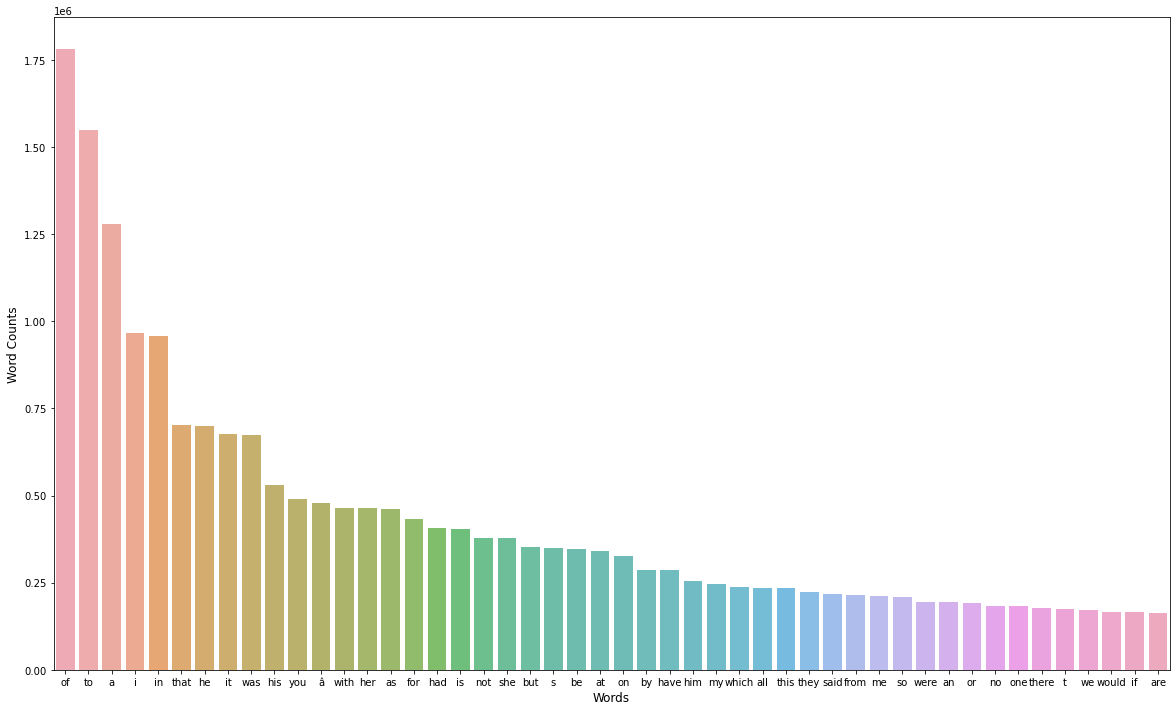

In [14]:
#Distribution of top 50 words in the text corpus without removing stop words
all_words = train_df['text'].str.split(expand=True).unstack().value_counts()
plt.figure(figsize=(20,12))
sns.barplot(all_words.index.values[2:50], all_words.values[2:50], alpha=0.8)
plt.ylabel('Word Counts', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.show()

In [12]:
train_df.author.unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50], dtype=int64)

## WordCloud Visualization

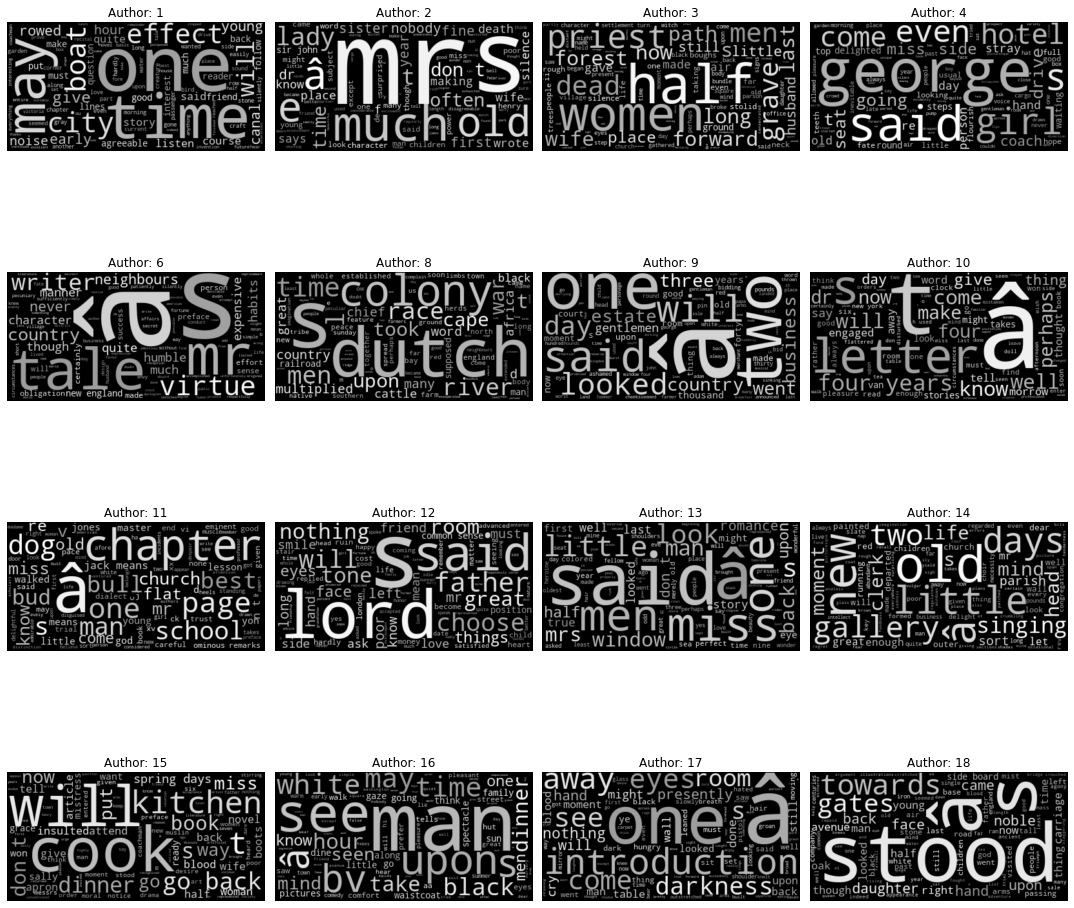

In [15]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

stopwords = set(STOPWORDS)

ncols = 4
nrows = 4
i=1
figsize = [15,15]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for i, axi in enumerate(ax.flat):
    author = train_df.author.unique()[i]
    text = train_df[train_df.author==author]["text"].values
    wc = WordCloud(background_color="black", max_words=100, 
               stopwords=stopwords)
    # generate word cloud
    wc.generate(text[0])
    axi.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
    axi.set_title("Author: "+ str(author))
    axi.set_aspect('equal')
    axi.axis("off")
plt.tight_layout(True)
plt.show()

## Preprocess

In [18]:
# remove stop words
train_df['text'] = train_df['text'].progress_apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stop))
test_df['text'] = test_df['text'].progress_apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stop))

100%|██████████████████████████████████████████████████████████████████████████| 38809/38809 [00:38<00:00, 1020.39it/s]


In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def remove_punctuations(text_context):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text_context)
    return ' '.join([word for word in new_words])

def stemming_data(text_content):
    words = word_tokenize(text_content)
    return ' '.join([stemmer.stem(word) for word in words])

def lemmatize_data(text_content):
    words = word_tokenize(text_content)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [ ]:
#Remove Punctuations
train_df['text'] = train_df['text'].apply(lambda x: remove_punctuations(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_punctuations(x))

#Perform stemming
train_df['text'] = train_df['text'].apply(lambda x: stemming_data(x))
test_df['text'] = test_df['text'].apply(lambda x: stemming_data(x))

# and lemmatization
train_df['text'] = train_df['text'].apply(lambda x: lemmatize_data(x))
test_df['text'] = test_df['text'].apply(lambda x: lemmatize_data(x))

## Train validation Split

In [11]:
# split the data in train and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train_df.text.values, train_df.author.values, 
                                                  stratify=train_df.author.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
print ('Length of Training data:',xtrain.shape[0])
print ('Length of Validation data :',xvalid.shape[0])

Length of Training data: 42942
Length of Validation data : 10736


In [12]:
# split the data in train and validation set
df_train, df_val = train_test_split(train_df ,stratify=train_df.author.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
train_df = None

## pure test data

In [13]:
test_df['author'] = test_author.reshape((test_df.shape[0]))
missing_authors = [5, 7, 31, 47, 49]
df_test = test_df.loc[~(test_df['author'].isin(missing_authors))]

# Custom Dataset

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased') # define tokenizer: use BertTokenizer for better results

class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.labels = [label-1 for label in (df['author'])]
        # tokenize each sample text using the tokenizer defined above 
        df['tokenized_text'] = df['text'].progress_apply(lambda x:tokenizer(x, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt"))
        self.texts = df['tokenized_text'].to_list()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

## Classification using BERT

In [7]:
class BertClassifier(nn.Module):
    def __init__(self, dropout=0.5):
        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 50)
        self.relu = nn.ReLU()    
    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return linear_output

#### Generate train and validation dataloader

In [16]:
train, val = Dataset(df_train), Dataset(df_val)
train_dataloader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=4)

100%|███████████████████████████████████████████████████████████████████████████| 10736/10736 [01:43<00:00, 103.25it/s]


In [28]:
test_dataloader = torch.utils.data.DataLoader(Dataset(df_test), batch_size=4)

100%|███████████████████████████████████████████████████████████████████████████| 25636/25636 [02:25<00:00, 176.48it/s]


In [17]:
with open('train_dataloader_bs4_sw.pkl', 'wb') as f:
    pickle.dump(train_dataloader, f)
with open('val_dataloader_bs4_sw.pkl', 'wb') as f:
    pickle.dump(val_dataloader, f)
with open('test_dataloader_bs4_sw.pkl', 'wb') as f:
    pickle.dump(test_dataloader, f)

# load dataloader

In [8]:
with open('train_dataloader_bs4_sw.pkl', 'rb') as f:
    train_dataloader = pickle.load(f)
with open('val_dataloader_bs4_sw.pkl', 'rb') as f:
    val_dataloader = pickle.load(f)
with open('test_dataloader_bs4_sw.pkl', 'rb') as f:
    test_dataloader = pickle.load(f)

# Train and Validation Pipeline

In [9]:
def train(model, train_dataloader, val_dataloader, learning_rate, epochs):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    # use_cuda = False
    # device = 'cpu'
    
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0
            total_train_samples = 0
            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.type(torch.long))
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc
                total_train_samples += len(train_label)
                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
                
                del batch_loss
                del output
                # break
            total_acc_val = 0
            total_loss_val = 0
            total_val_samples = 0
            with torch.no_grad():

                for val_input, val_label in tqdm(val_dataloader):

                    val_label = val_label.type(torch.LongTensor).to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
                    total_val_samples += len(val_label)
                    
                    del batch_loss
                    del output
                    # break
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_dataloader): .3f} \
                | Train Accuracy: {total_acc_train / (total_train_samples): .3f} \
                | Val Loss: {total_loss_val / len(val_dataloader): .3f} \
                | Val Accuracy: {total_acc_val / (total_val_samples): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-4
              
train(model, train_dataloader, val_dataloader, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████████████████████████████████████████████████████████████████████████| 2684/2684 [02:59<00:00, 14.96it/s]


Epochs: 1 | Train Loss:  3.516                 | Train Accuracy:  0.123                 | Val Loss:  3.485                 | Val Accuracy:  0.123


100%|██████████████████████████████████████████████████████████████████████████████| 2684/2684 [03:00<00:00, 14.85it/s]


Epochs: 2 | Train Loss:  3.520                 | Train Accuracy:  0.121                 | Val Loss:  3.494                 | Val Accuracy:  0.128


100%|██████████████████████████████████████████████████████████████████████████████| 2684/2684 [02:59<00:00, 14.92it/s]


Epochs: 3 | Train Loss:  3.495                 | Train Accuracy:  0.127                 | Val Loss:  3.486                 | Val Accuracy:  0.129


100%|██████████████████████████████████████████████████████████████████████████████| 2684/2684 [02:59<00:00, 14.93it/s]


Epochs: 4 | Train Loss:  3.488                 | Train Accuracy:  0.128                 | Val Loss:  3.489                 | Val Accuracy:  0.129


 43%|█████████████████████████████████                                            | 4610/10736 [17:17<22:59,  4.44it/s]


KeyboardInterrupt: 

**We interrupted the training of BERT model as it took 40 mins to train model in each epoch, as well as it was computational intensive. Multiple times our systems ran out of memory.**

In [ ]:
def evaluate(model, test_dataloader):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    total_test = 0
    with torch.no_grad():

        for test_input, test_label in tqdm(test_dataloader):

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
            total_test += test_label.shape[0]
    
    print(f'Test Accuracy: {total_acc_test / (total_test): .3f}')
    
evaluate(model, test_dataloader)